### SMAC search using the custom Search and SMACSearch classes
This notebook makes use of the SMACSearch class to run a search for a specified set of parameters

In [1]:
# Imports
import os, sys
p = os.path.abspath('../..')
sys.path.insert(1, p)
from search import SMACSearch
from utils import add_to_autosklearn_pipeline

In [2]:
# Experiment parameters
dataset = 'Cardiotocography'
dataset_iter = 1
classifiers = [
    #'ABODClassifier',
    'CBLOFClassifier',
    'COPODClassifier',
    #'ECODClassifier',
    #'HBOSClassifier',
    'IForestClassifier',
    'KNNClassifier',
    'LOFClassifier',
    #'PCAClassifier',
    #'RODClassifier'
]
total_budget = 300
per_run_budget = 30
validation_strategy = 'balanced'
validation_size = 200
output_dir = 'misc_output'
#
# Add classifiers to Auto-Sklearn
add_to_autosklearn_pipeline(classifiers)

Running Search:
  Dataset:	 Cardiotocography 1
  Type:		 smac
  Budget:	 300
  Validation:	 (balanced, 100)
  Classifiers:	 ['CBLOFClassifier', 'COPODClassifier', 'IForestClassifier', 'KNNClassifier', 'LOFClassifier']
Outliers in train_eval set: 349
Outliers in training set: 299
Outliers in validation set: 50
Percentage of outliers in train_eval set: 0.22018927444794953
Percentage of outliers in training set: 0.20134680134680136
Percentage of outliers in validation set: 0.5
[WARNING] [2022-05-08 22:07:01,301:Client-autosklearn.automl_common.common.utils.backend] Directory /tmp/auto-sklearn_tmp_5dbe21e9-cf01-11ec-8a8e-41137aeafb86/.auto-sklearn/ensembles does not exist


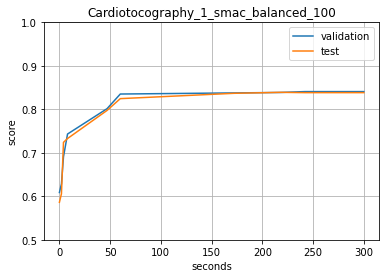

auto-sklearn results:
  Dataset name: Cardiotocography1
  Metric: roc_auc
  Best validation score: 0.840800
  Number of target algorithm runs: 162
  Number of successful target algorithm runs: 161
  Number of crashed target algorithm runs: 0
  Number of target algorithms that exceeded the time limit: 1
  Number of target algorithms that exceeded the memory limit: 0

 rank_test_scores  status param_classifier:__choice__  mean_test_score  mean_fit_time  metric_roc_auc  metric_average_precision
                1 Success           IForestClassifier           0.8408       0.813755          0.8408                  0.802114
                2 Success           IForestClassifier           0.8388       0.823002          0.8388                  0.809638
                2 Success           IForestClassifier           0.8388       0.892431          0.8388                  0.809638
                2 Success           IForestClassifier           0.8388       0.871929          0.8388                  

<Figure size 432x288 with 0 Axes>

In [3]:
# SMAC search
smac_search = SMACSearch(
    dataset_name=dataset,
    dataset_iter=dataset_iter,
    classifiers=classifiers,
    validation_strategy=validation_strategy,
    validation_size=validation_size,
    total_budget=total_budget,
    per_run_budget=per_run_budget,
    output_dir=output_dir
)
# Run search
smac_search.run()
# Print results
smac_search.plot_scores()
smac_search.print_summary()
smac_search.print_rankings()
smac_search.save_results()